# Using the "databaseplot.py" module and functions

##### Author: Thomas Richards (tcrichards1990@gmail.com)
Please let me know if you have any comments, suggestions or questions regarding this notebook.

---------------

## Summary
'databaseplot.py' is a module with tools for accessing and plotting from a database file 'database.db which contains data from the API of the Connected Places Smart Building. This notebook goes through the functions and explains the expected inputs and the format of the output variables. Before you run this file, make sure that 'database.db' contains data from which to plot. For information on how to do this, see the README.md file.

-------------- 


### 1. The DatabasePlotter() class

All functions within databaseplot.py run as methods from the class: DatabasePlotter(). The class contains attributes which are needed for plotting. These include sensor and room information retrieved from the file 'database.db', variables for the connection to the database, labels for the plots, and the input variables for plotting.

In [13]:
# Import the DatabasePlotter class which is the tool for plotting.
from databaseplot import DatabasePlotter

# Assign a class instance to see the attributes
databaseplotter = DatabasePlotter()

# Print all the attributes
print(vars(databaseplotter))

Sensor locations retrieved successfully.
Room information retrieved successfully.
Closing connection to the database
{'conn': <sqlite3.Connection object at 0x000001AEEC8FB1F0>, 'c': <sqlite3.Cursor object at 0x000001AEEC8FEA40>, 'sensor_location_info':                                           sensor_id  \
sensor_number                                         
1              fcc9eedc-fc65-4682-85d2-21681242c05f   
2              c2b0e788-f223-4817-84c4-bad87c538170   
3              fd47bcce-a6bc-435a-8255-a3b1b5413a82   
4              40ffd8a9-fd7b-4fc1-877a-86180b6c8e8c   
5              f3195103-4d0d-4598-8d8b-51225eb967c5   
6              ed1e3636-9a03-4225-be5f-41868331eac7   
7              f0099fec-f8ac-4002-a259-fc27d653da32   
8              bde60e23-12d9-4af8-af15-0125cd0281eb   
9              4d3ba73a-917c-43d4-b88d-8554a0e9ec4f   
10             c3a6b1f3-8079-4539-a079-ed727bb980bc   
11             5df811ae-bc26-444d-b7a6-7d72ea80fb78   
12             d192a6f6-0adb-4e8

### The 'plot_from_database()' function

All plotting occurs through the command 'plot_from_database()'. This can be run using default arguments with no inputs, though this will take some time depending on how much data are in 'database.db':

    DatabasePlotter.plot_from_database()

'plot_from_database()' takes a number of arguments depending on the usages. If the inputs are not set, defaults are used. The 'time_from' and 'time_to' arguments specify the time range to plot. These arguments must be in ms time epoch format (see https://currentmillis.com/ ).

So that plotting is faster in this notebook, we will specify these first as midnight on the 10th March and midnight on the 11th March 2020, respectively.

    time_from = 1583798400000
    time_to = 1583884800000

Run the code below to plot using the defaults arguments for all inputs except these times. Plots are saved in the 'Plots' folder in the parent directory. You may have to create this if it does not exist already. Each dot represents one sensor reading, so you if there are gaps where there are no readings, there will just be a line.

Sensor locations retrieved successfully.
Room information retrieved successfully.
No sensors or rooms entered, setting to default (all).
Plotting overlaid data from 2 sensors from room 1: 0-Café...


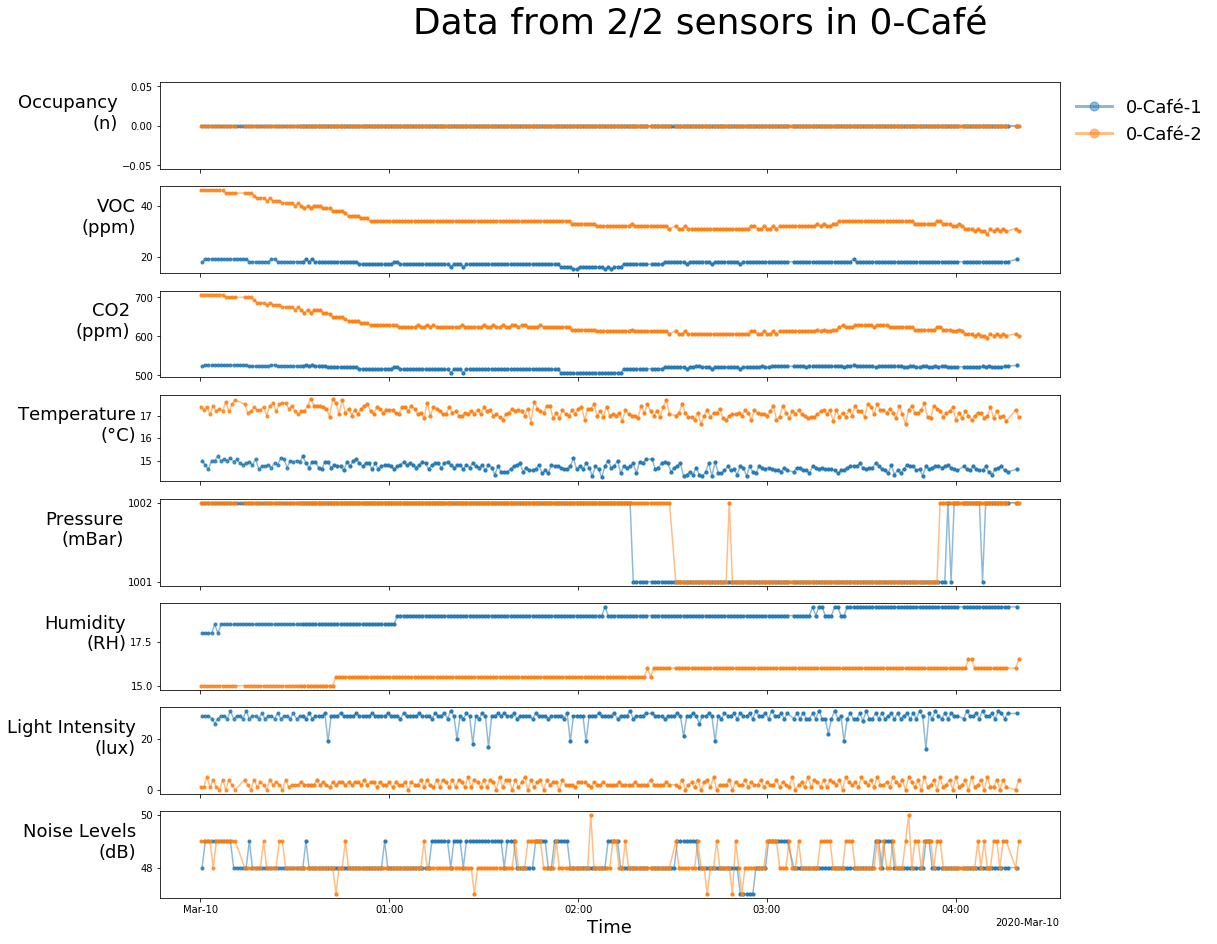

Plotting overlaid data from 3 sensors from room 2: 0-Exhibition-Area...


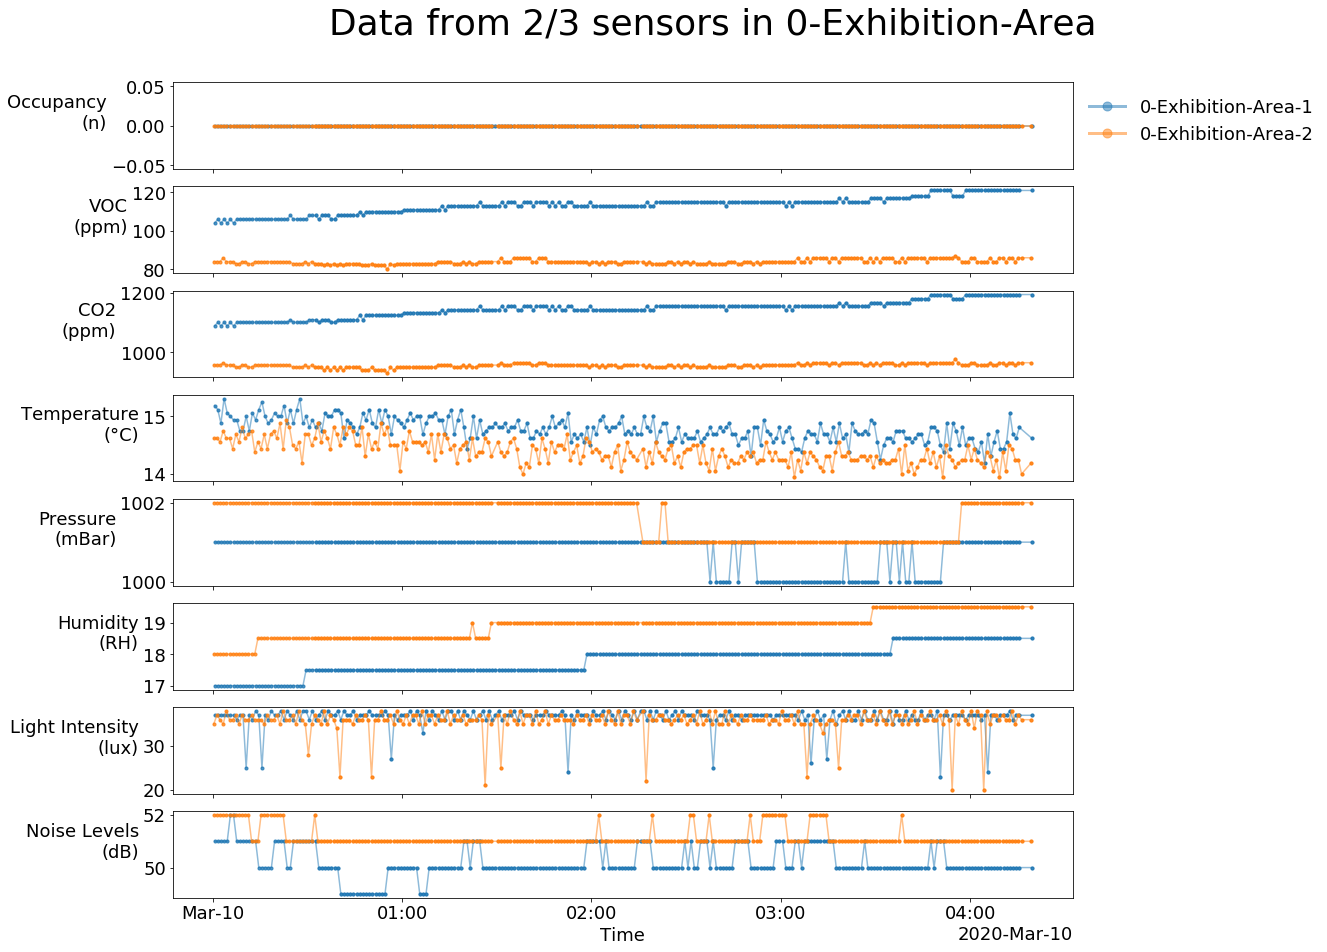

Plotting overlaid data from 11 sensors from room 3: 2-Open-Office...


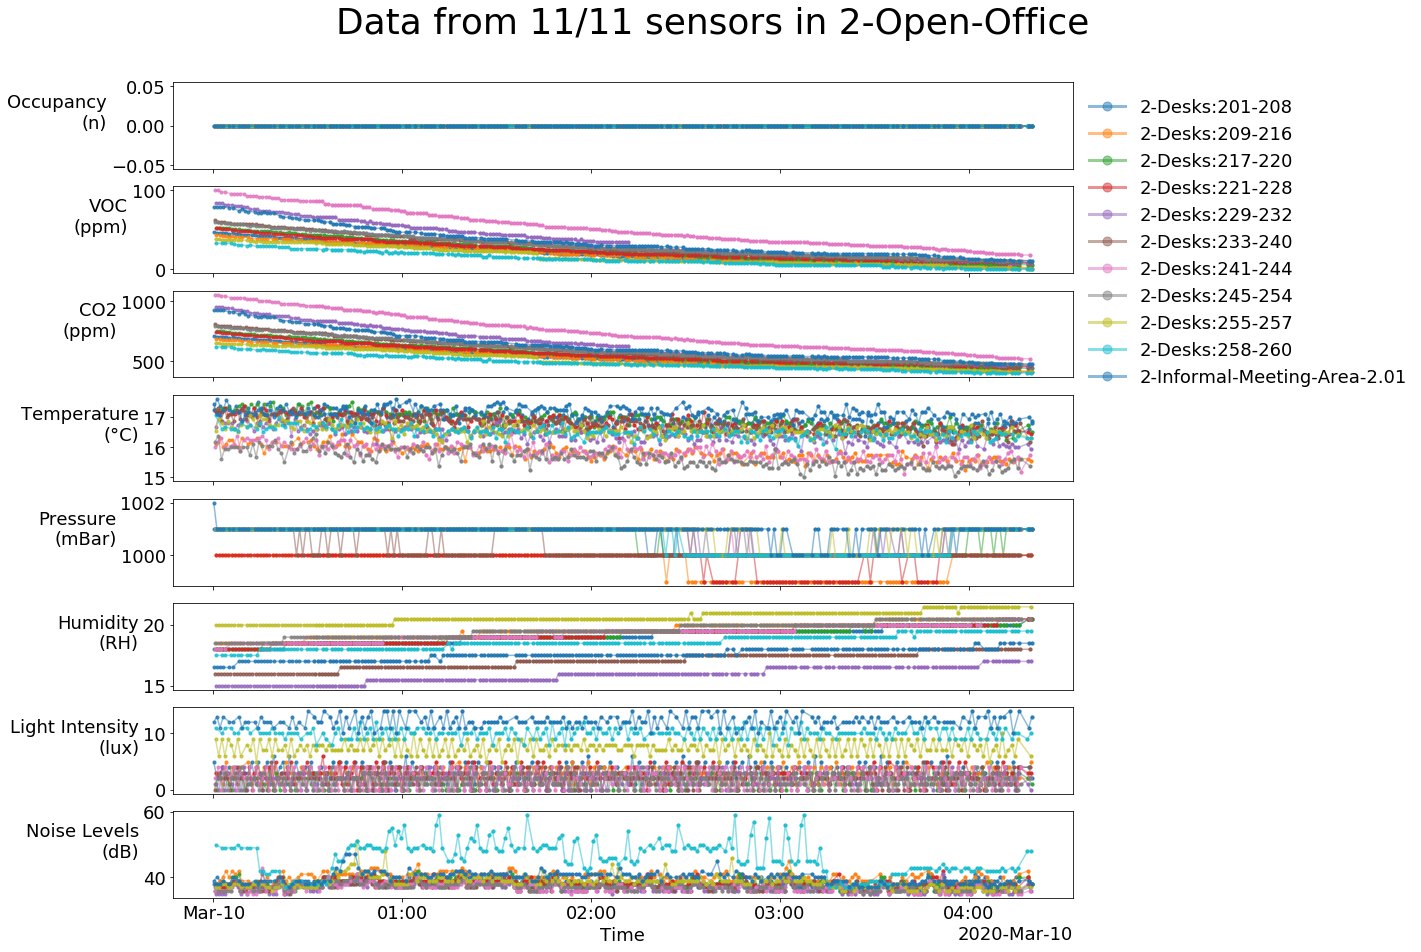

No data from one of the following:
    Room name(s): LG-Meeting-Room-LG01. 
    Sensor number(s): 17, 19.
No data from one of the following:
    Room name(s): LG-Meeting-Room-LG02. 
    Sensor number(s): 18.
No data from one of the following:
    Room name(s): UM-Meeting-Room-UM01. 
    Sensor number(s): 20.
No data from one of the following:
    Room name(s): UM-Meeting-Room-UM02. 
    Sensor number(s): 21.
No data from one of the following:
    Room name(s): UM-Meeting-Room-UM03. 
    Sensor number(s): 22.
Closing connection to the database


In [8]:
# Specify the time range
time_from = 1583798400000
time_to = 1583884800000

# Plot with all arguments as default except from time_from and time_to
DatabasePlotter().plot_from_database(time_from=time_from, time_to=time_to)

### Input arguments for 'plot_from_database' 

'plot_from_database' takes the following arguments, which we will explore in this notebook:

    choose_by_input   Default: Don't run from prompts
    sensors           Default: all 
    rooms             Default: all
    time_from         Default: first available
    time_to           Default: time now
    parameters        Default: all ['occupancy', 'voc', 'co2', 'temperature', 'pressure',   
                                    'humidity', 'lux', 'noise']
    overlay           Default: 1 - overlay plots from the differnet sensors
    aggregate         Default: 0 - do not aggregate
    seperate          Default: 1 - different plots for different rooms

### Specifying the sensors to plot

You can specify which sensors numbers using the 'sensors' argument. This input should be a list, and can be either the sensor number, or the sensor name. You do not have to specify which you are inputting, but they do have to match those stored as attributes of the DatabasePlotter() class in lists.

In [12]:
# Print sensor numbers
databaseplotter = DatabasePlotter()
print("\n_________________________________________________________________________________________________\nSensor numbers\n_________________________________________________________________________________________________\n")
print(databaseplotter.all_sensor_numbers)

# Print sensor names
print("\n_________________________________________________________________________________________________\nSensor names\n_________________________________________________________________________________________________\n")
print(databaseplotter.all_sensor_names)

Sensor locations retrieved successfully.
Room information retrieved successfully.
Closing connection to the database

_________________________________________________________________________________________________
Sensor numbers
_________________________________________________________________________________________________

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

_________________________________________________________________________________________________
Sensor names
_________________________________________________________________________________________________

['0-Café-1', '0-Café-2', '0-Cafe-3', '0-Exhibition-Area-1', '0-Exhibition-Area-2', '2-Desks:201-208', '2-Desks:209-216', '2-Desks:217-220', '2-Desks:221-228', '2-Desks:229-232', '2-Desks:233-240', '2-Desks:241-244', '2-Desks:245-254', '2-Desks:255-257', '2-Desks:258-260', '2-Informal-Meeting-Area-2.01', 'LG-Meeting-Room-LG01', 'LG-Meeting-Room-LG02', '[remove]LG-Meeting-Room-L

So to plot using sensor numbers...

Sensor locations retrieved successfully.
Room information retrieved successfully.
Plotting overlaid data from 2 sensors from room 1: 0-Café...


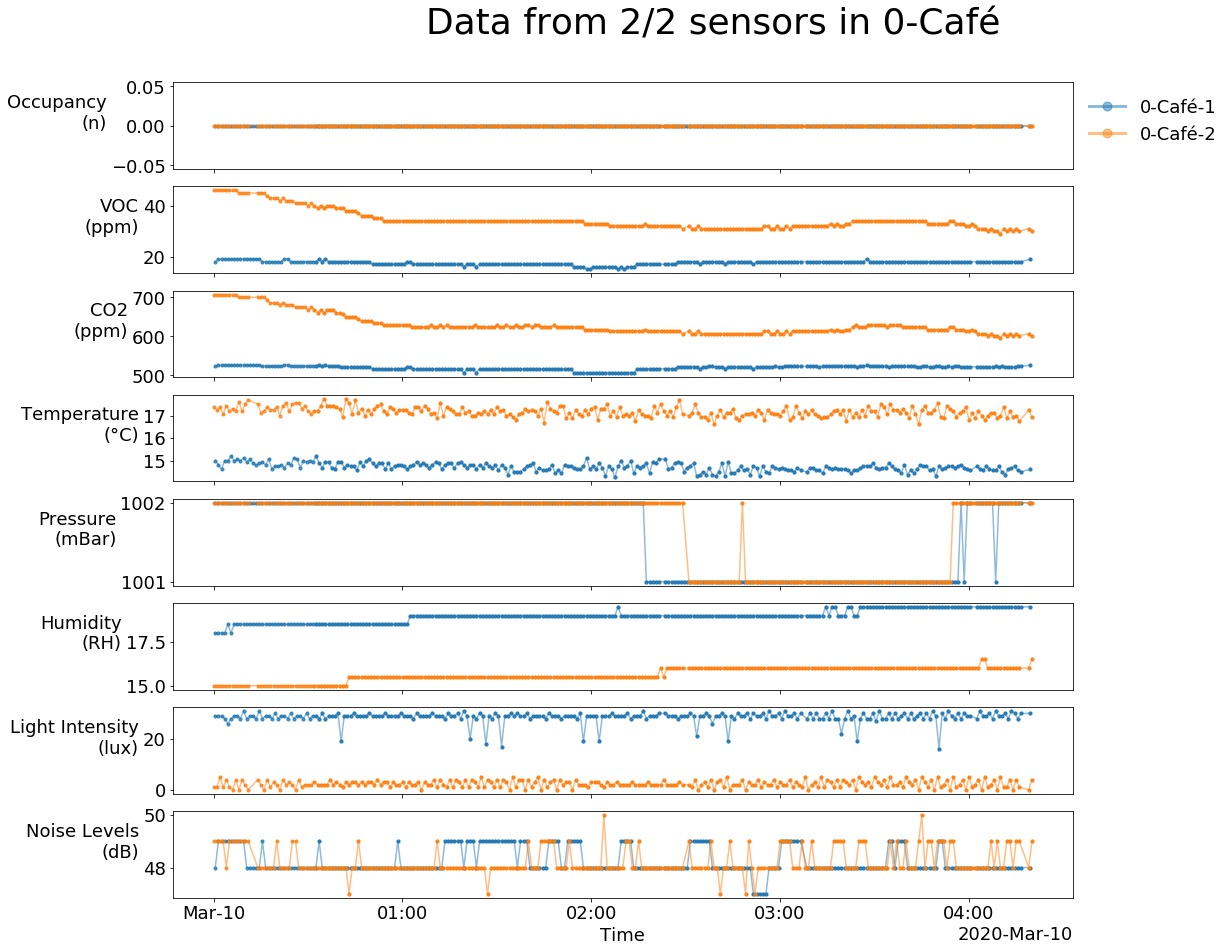

No data from one of the following:
    Room name(s): 0-Exhibition-Area. 
    Sensor number(s): 3.
Closing connection to the database


In [17]:
# Choose some sensor numbers...
sensor_numbers = databaseplotter.all_sensor_numbers[0:3]

# Plot from just these sensors (with all arguments as default except from time_from and time_to)
DatabasePlotter().plot_from_database(sensors=sensor_numbers, time_from=time_from, time_to=time_to)

... or using sensor names. By default, plots from different sensors will be overlaid, but sensors in different rooms will be on seperate plots.

Sensor locations retrieved successfully.
Room information retrieved successfully.
Plotting overlaid data from 2 sensors from room 1: 0-Café...


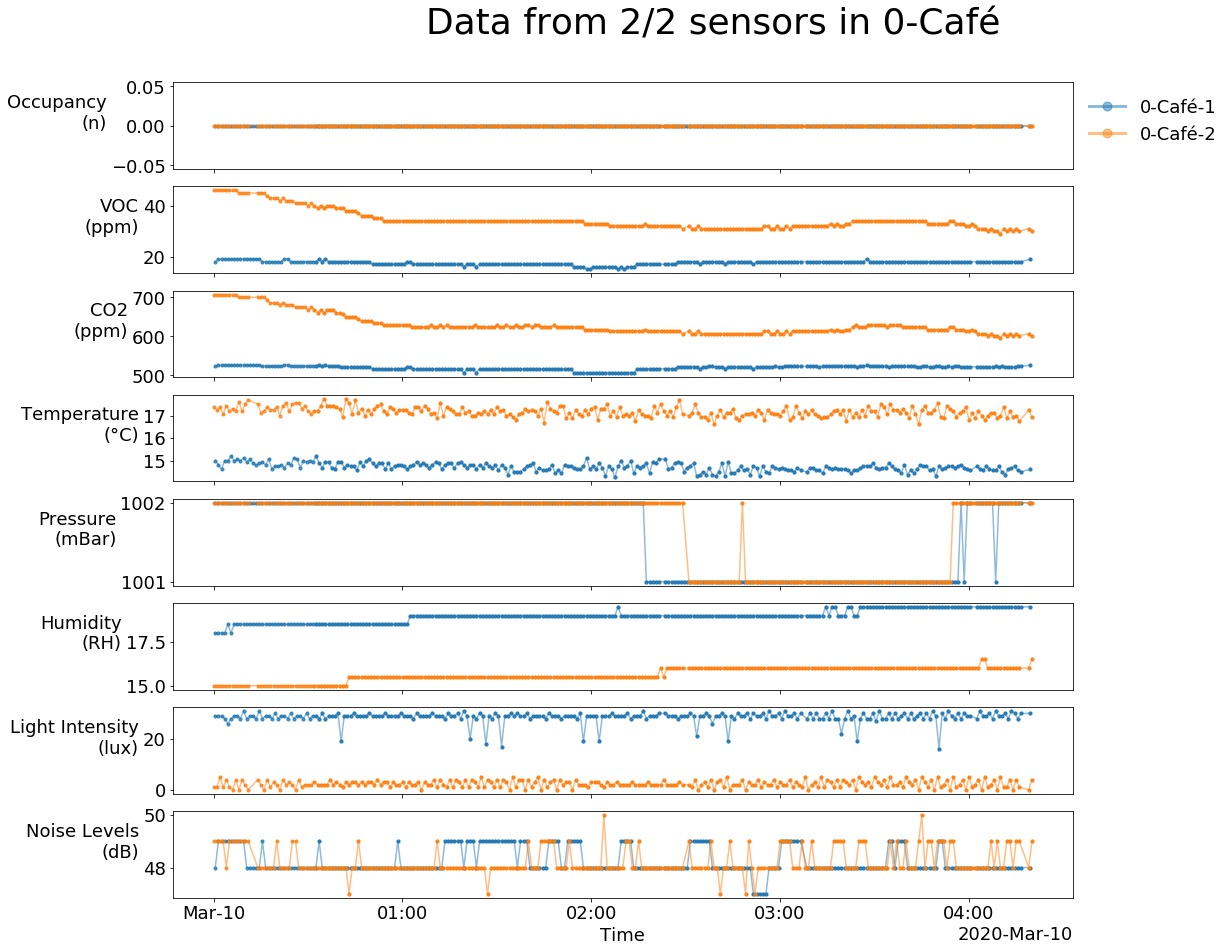

Plotting overlaid data from 3 sensors from room 2: 0-Exhibition-Area...


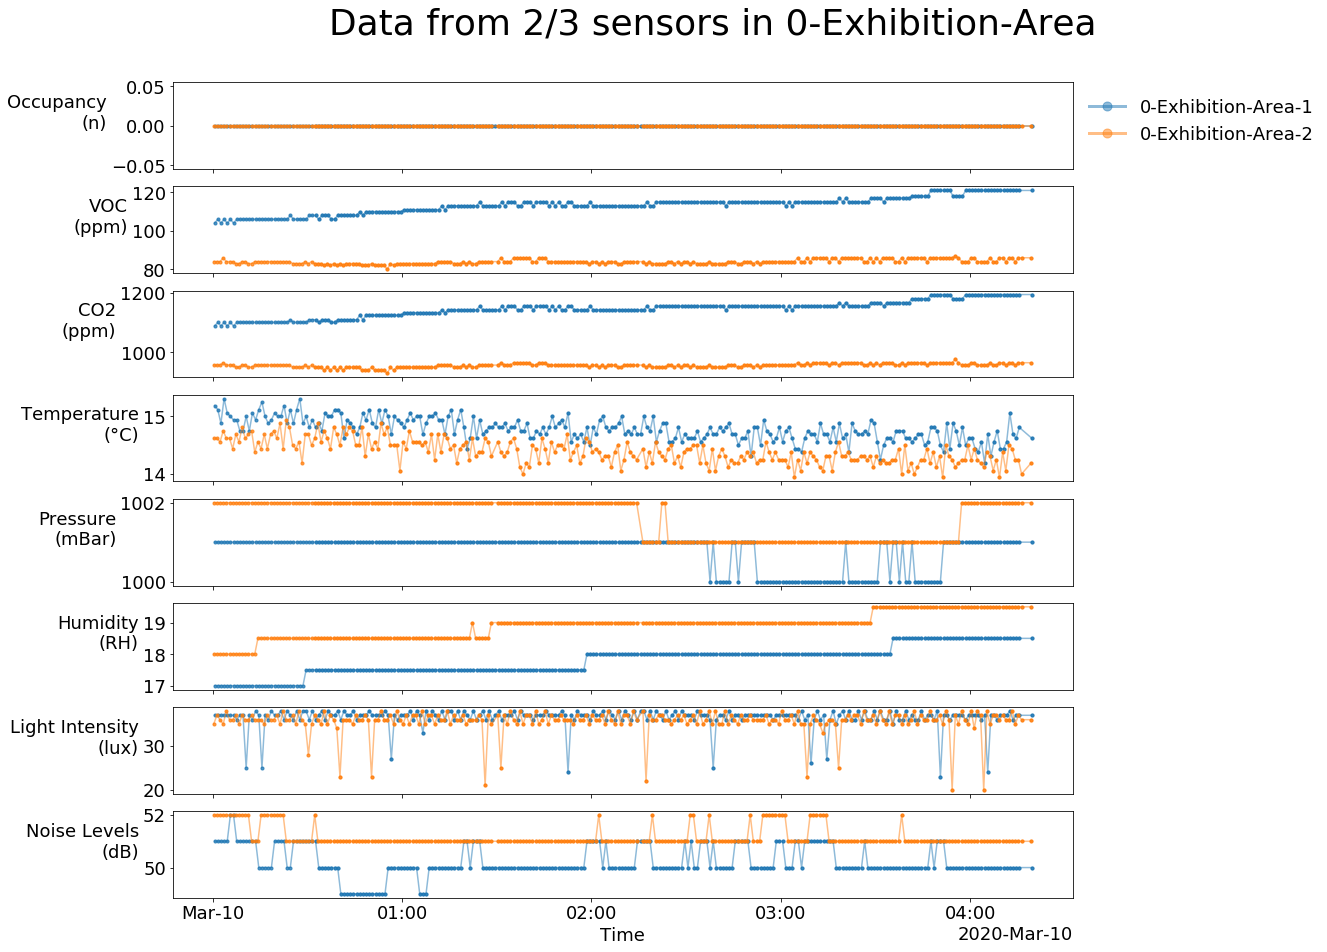

Plotting overlaid data from 1 sensors from room 3: 2-Open-Office...


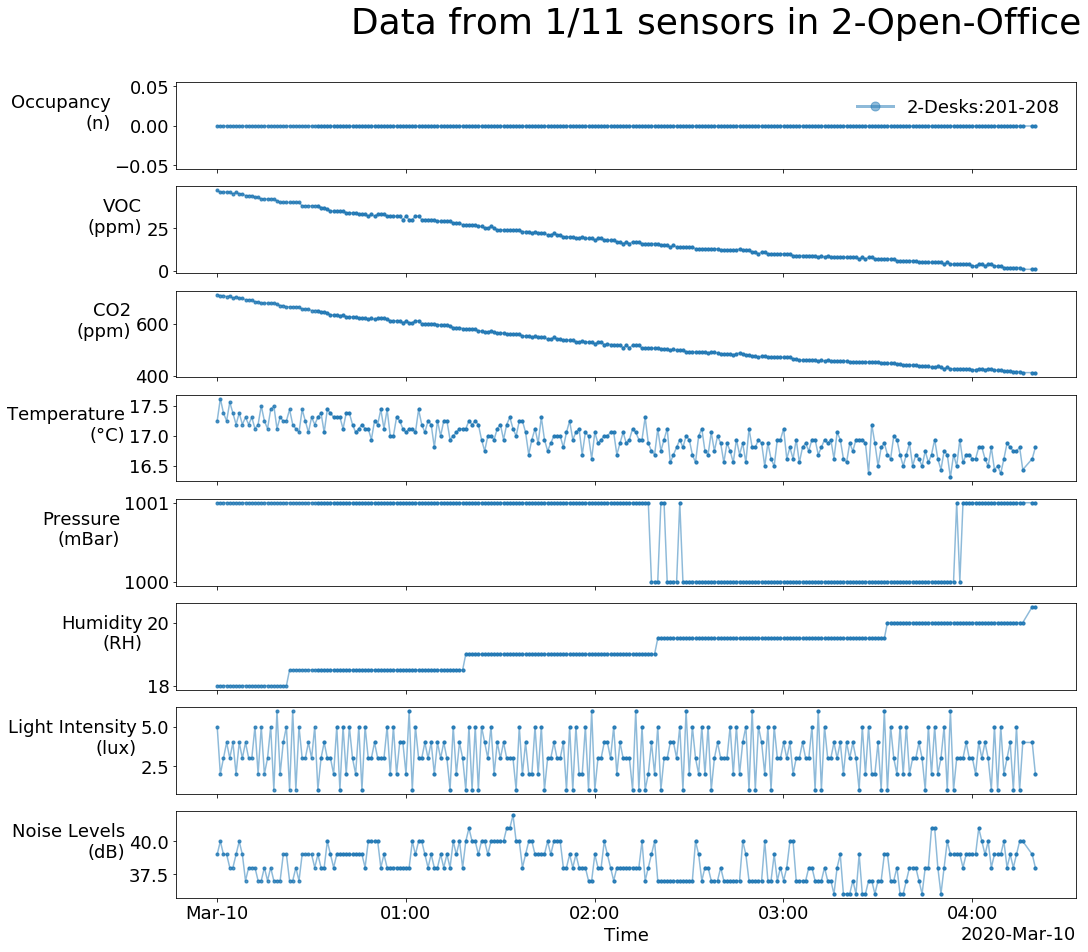

Closing connection to the database


In [19]:
# check databaseplotter.all_sensor_names for a list.

# Plot from just these sensors (with all arguments as default except from time_from and time_to)
DatabasePlotter().plot_from_database(sensors=['0-Café-1', '0-Café-2', '0-Cafe-3', '0-Exhibition-Area-1',
                                              '0-Exhibition-Area-2', '2-Desks:201-208'], 
                                     time_from=time_from, time_to=time_to)

### Specify the sensor to plot by room

You can also use room number and room name to choose which sensors to plot. Lists of these can be found in:

    databaseplotter.all_room_numbers
and:

    databaseplotter.all_room_names

Room names and numbers are specified in a similar way to sensor names or numbers, but instead using the 'room' input:
    
    DatabasePlotter().plot_from_database(rooms=[1, 2, ,3])

or:

    DatabasePlotter().plot_from_database(rooms=['0-Café', '0-Exhibition-Area', '2-Open-Office'])

### Overlaying sensors from different rooms

There are multiple sensors  in each room. When there are multiple rooms input, this works by default the same as when choosing sensors - sensors from different rooms are overlaid on seperate plots. If you want to plot each sensor individually, set the 'overlay' parameter to 0.

Sensor locations retrieved successfully.
Room information retrieved successfully.
Plotting data from sensor 1: 0-Café-1...


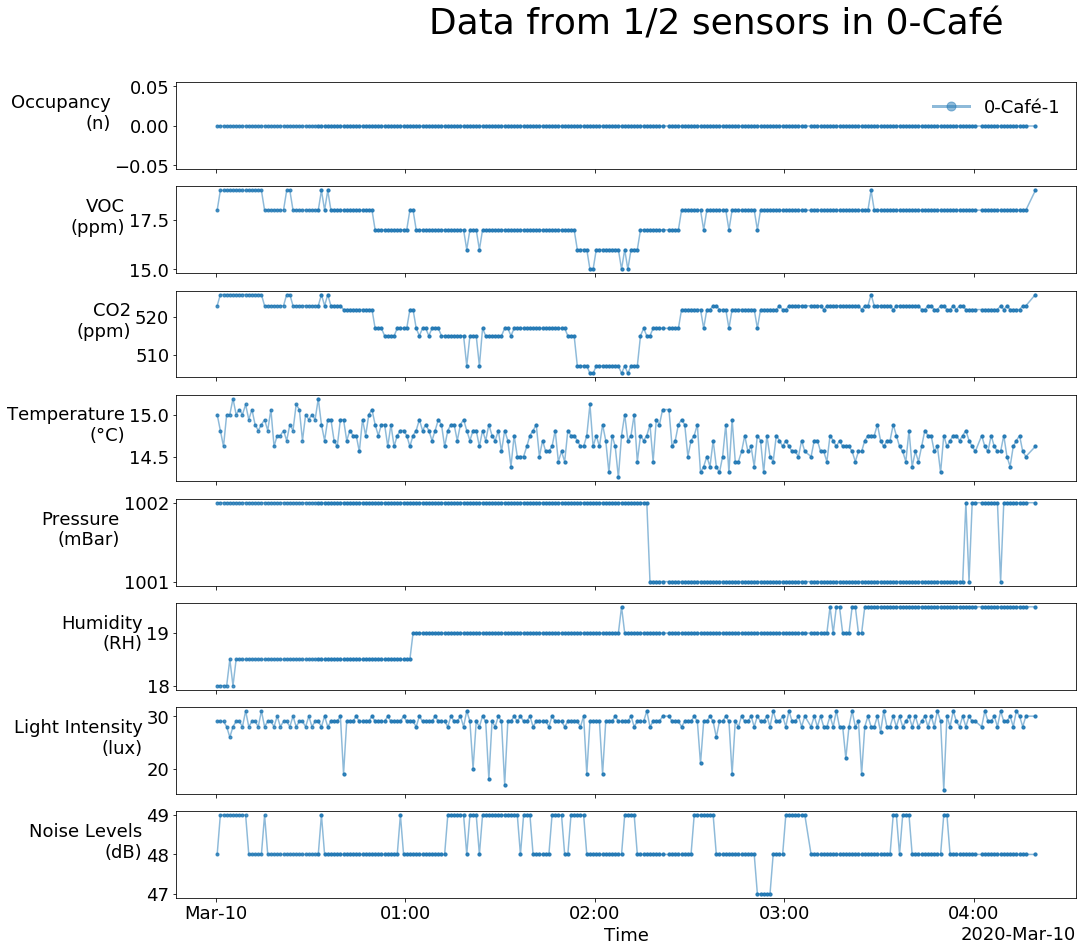

Plotting data from sensor 2: 0-Café-2...


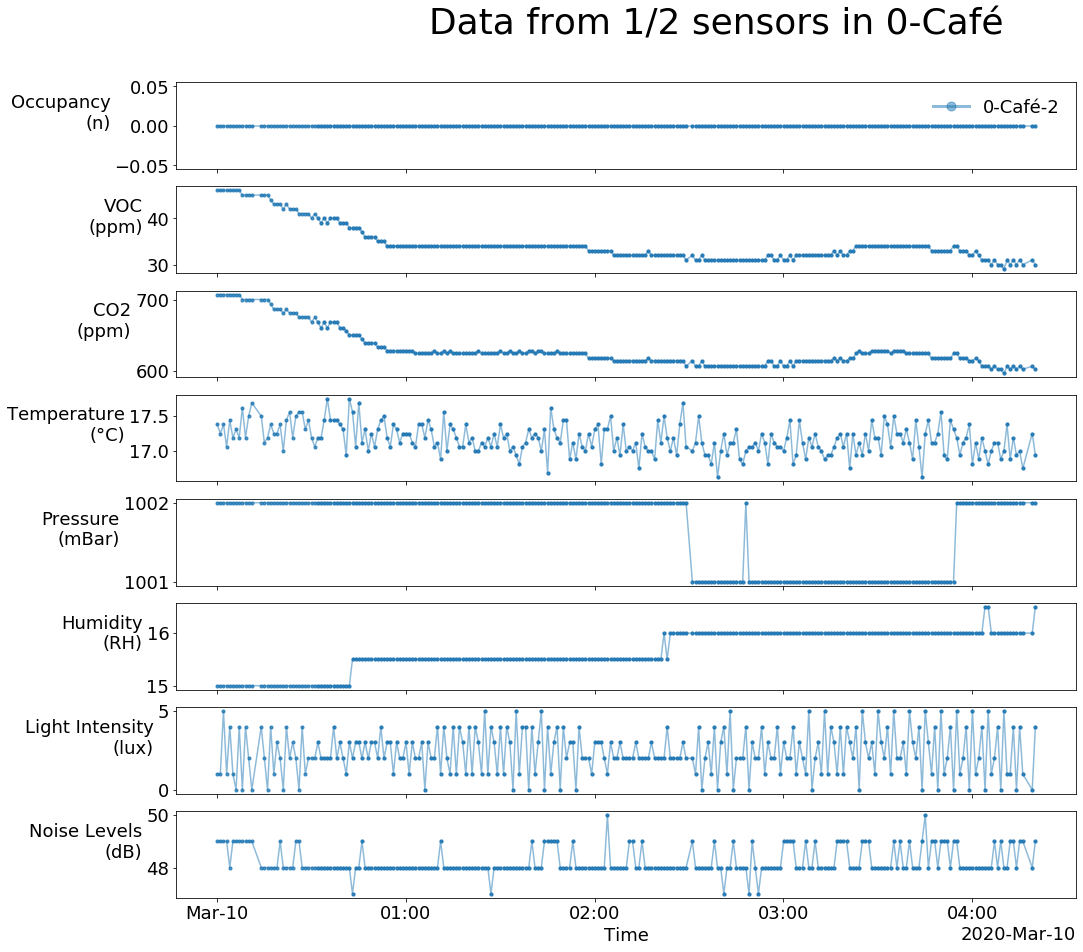

No data from one of the following:
    Room name(s): 0-Exhibition-Area. 
    Sensor number(s): 3.
Plotting data from sensor 4: 0-Exhibition-Area-1...


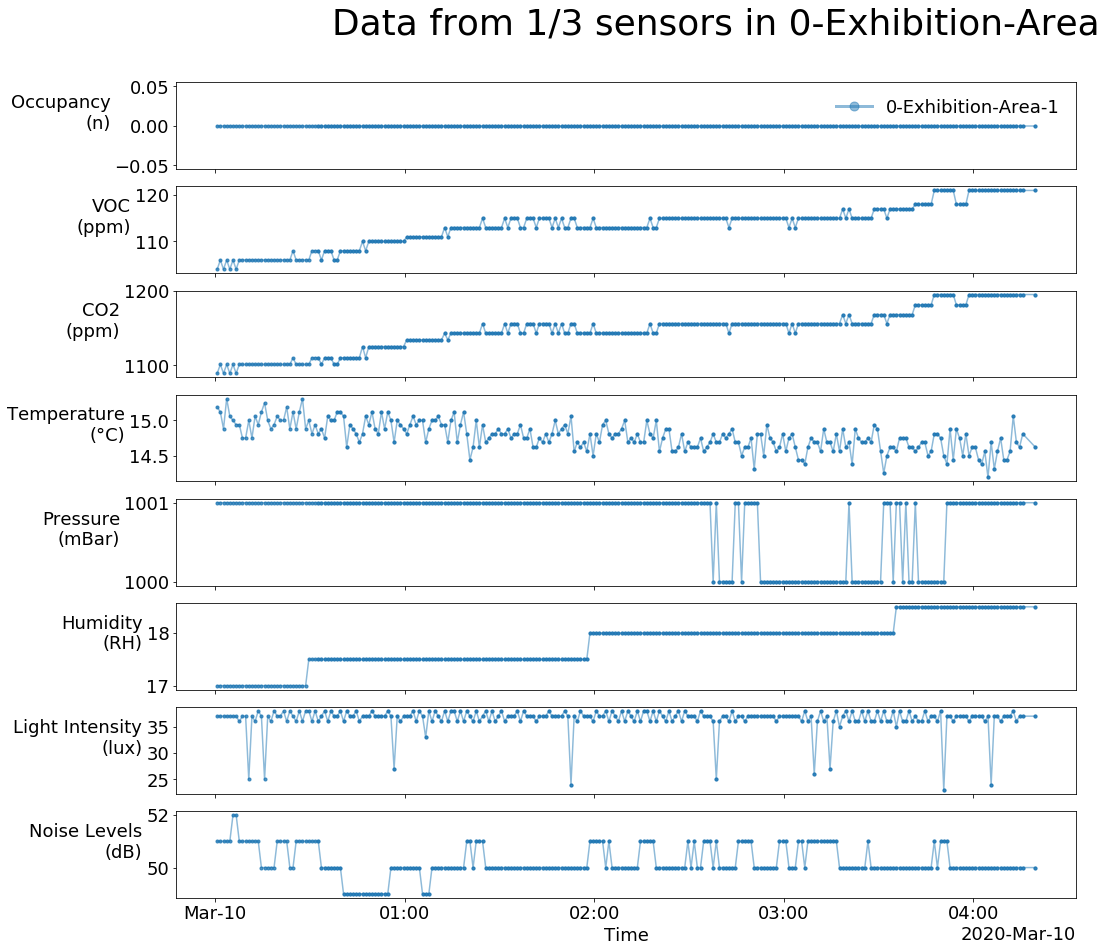

Plotting data from sensor 5: 0-Exhibition-Area-2...


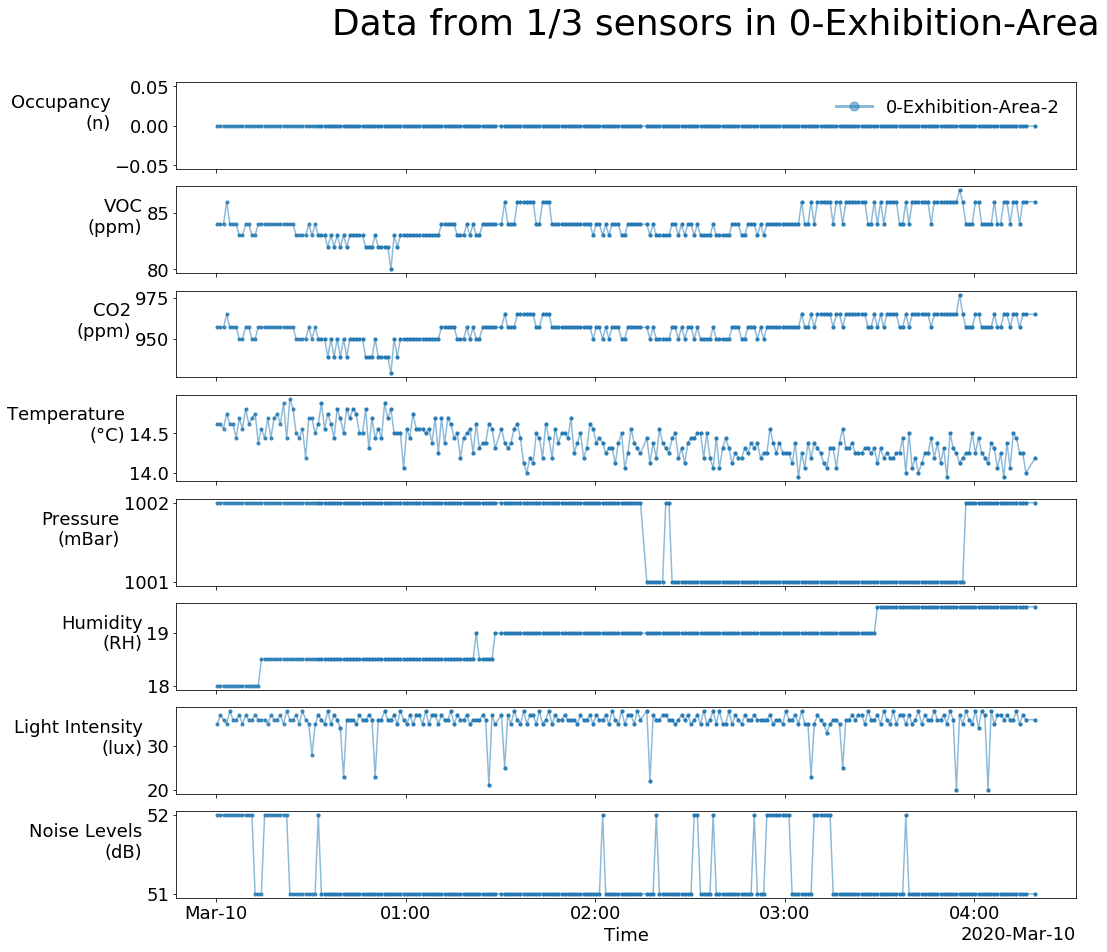

Plotting data from sensor 6: 2-Desks:201-208...


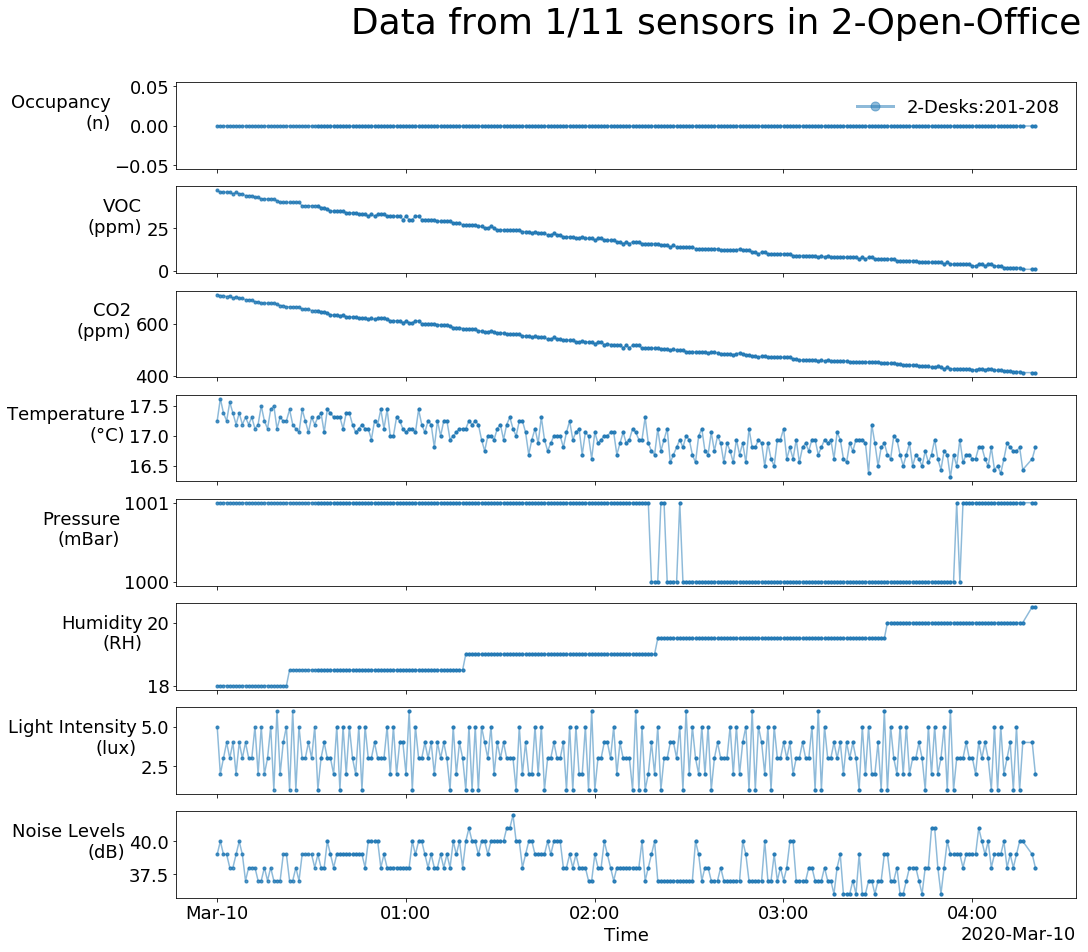

Plotting data from sensor 7: 2-Desks:209-216...


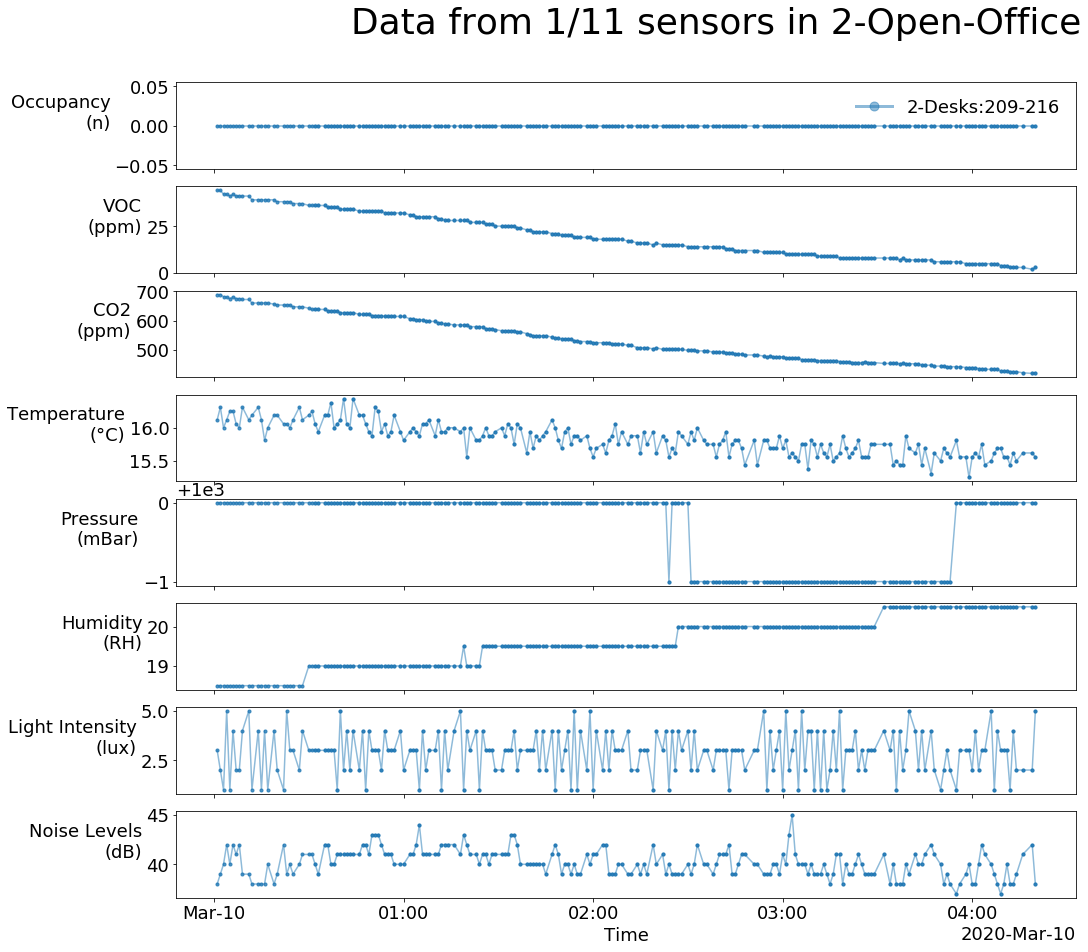

Plotting data from sensor 8: 2-Desks:217-220...


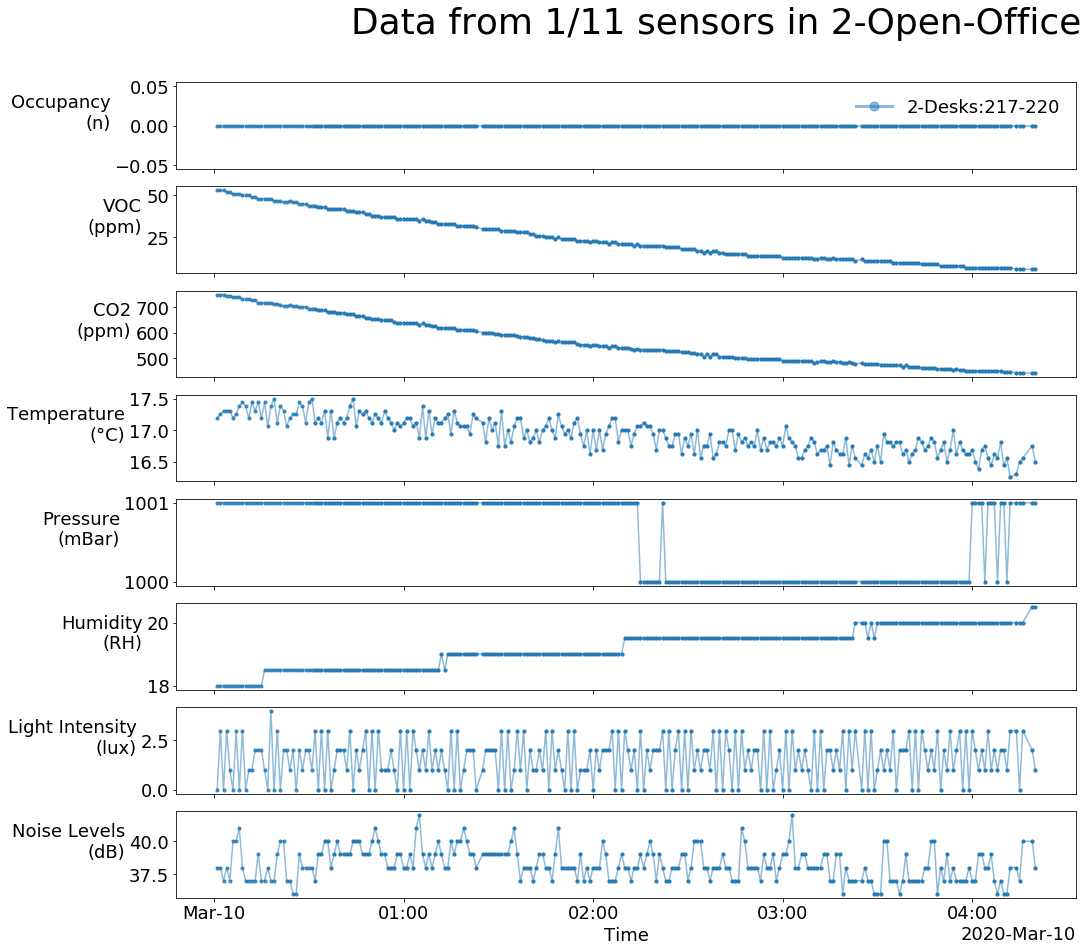

Plotting data from sensor 9: 2-Desks:221-228...


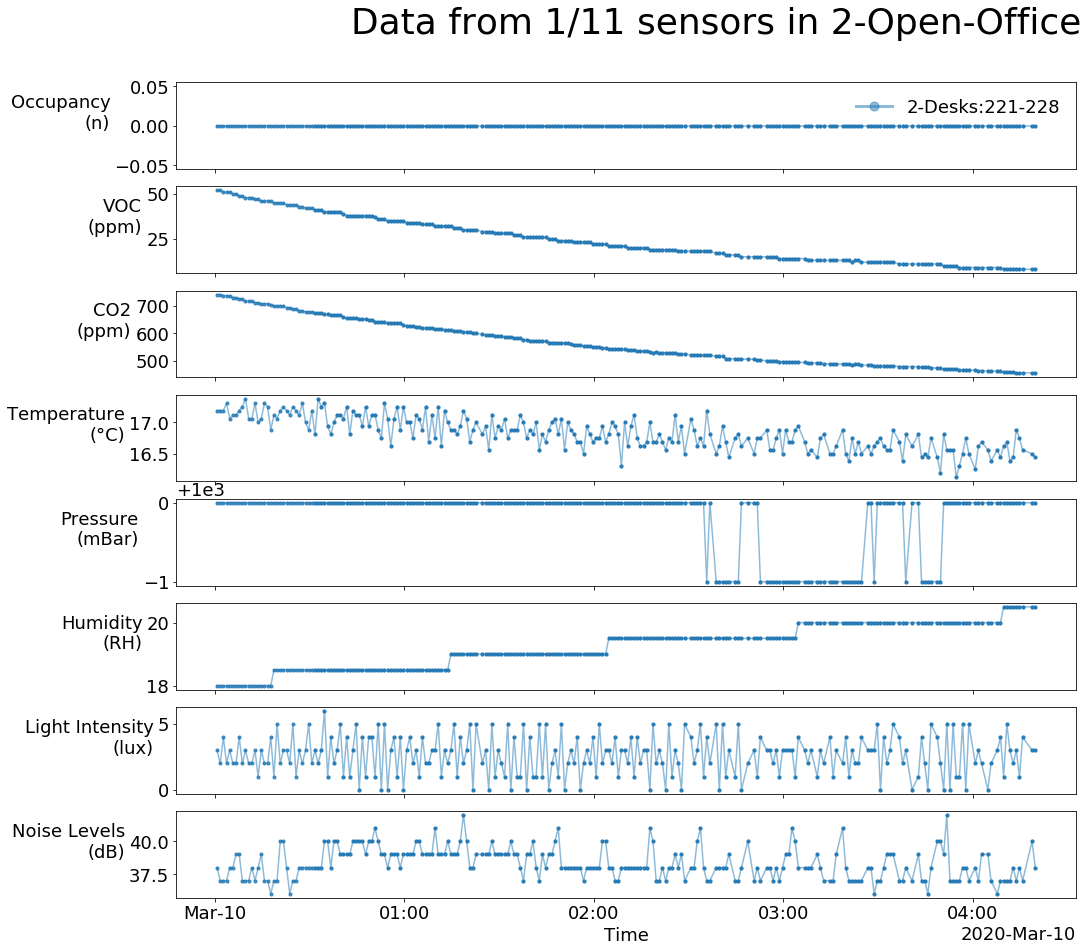

Plotting data from sensor 10: 2-Desks:229-232...


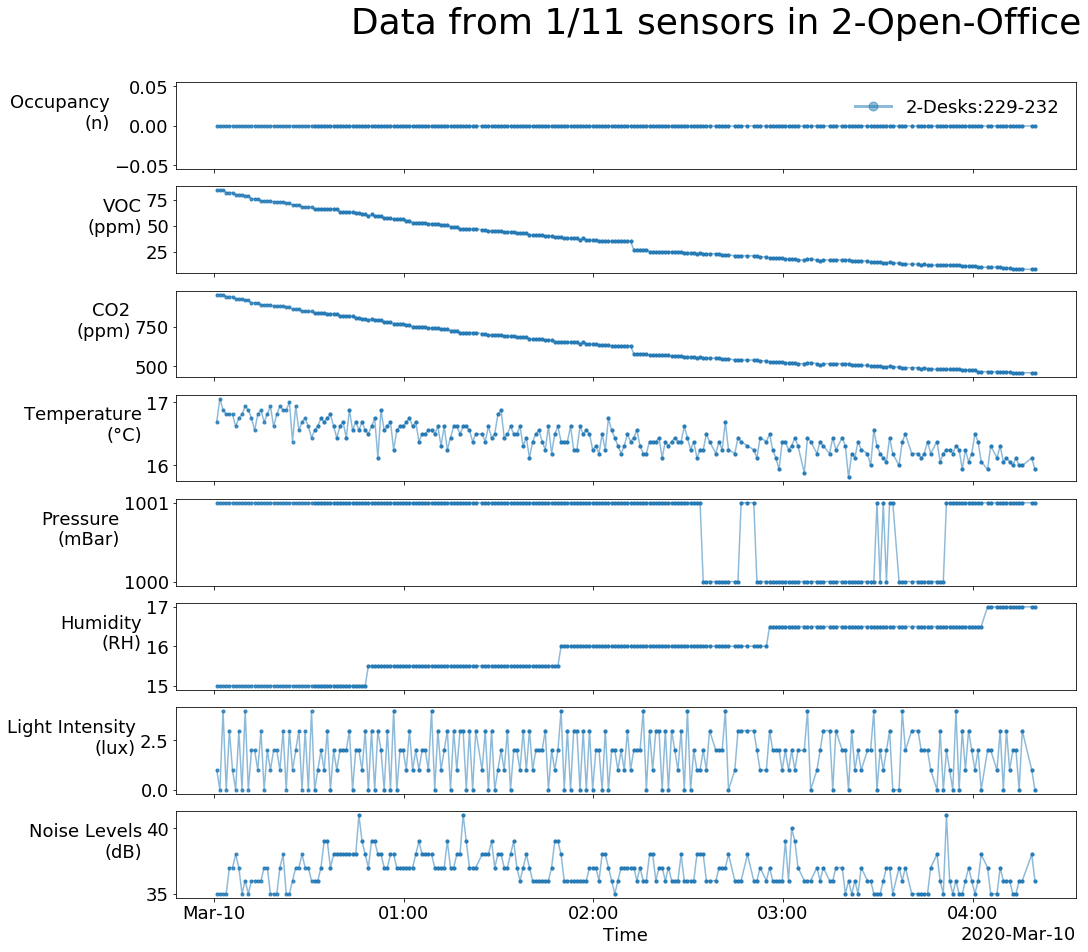

Plotting data from sensor 11: 2-Desks:233-240...


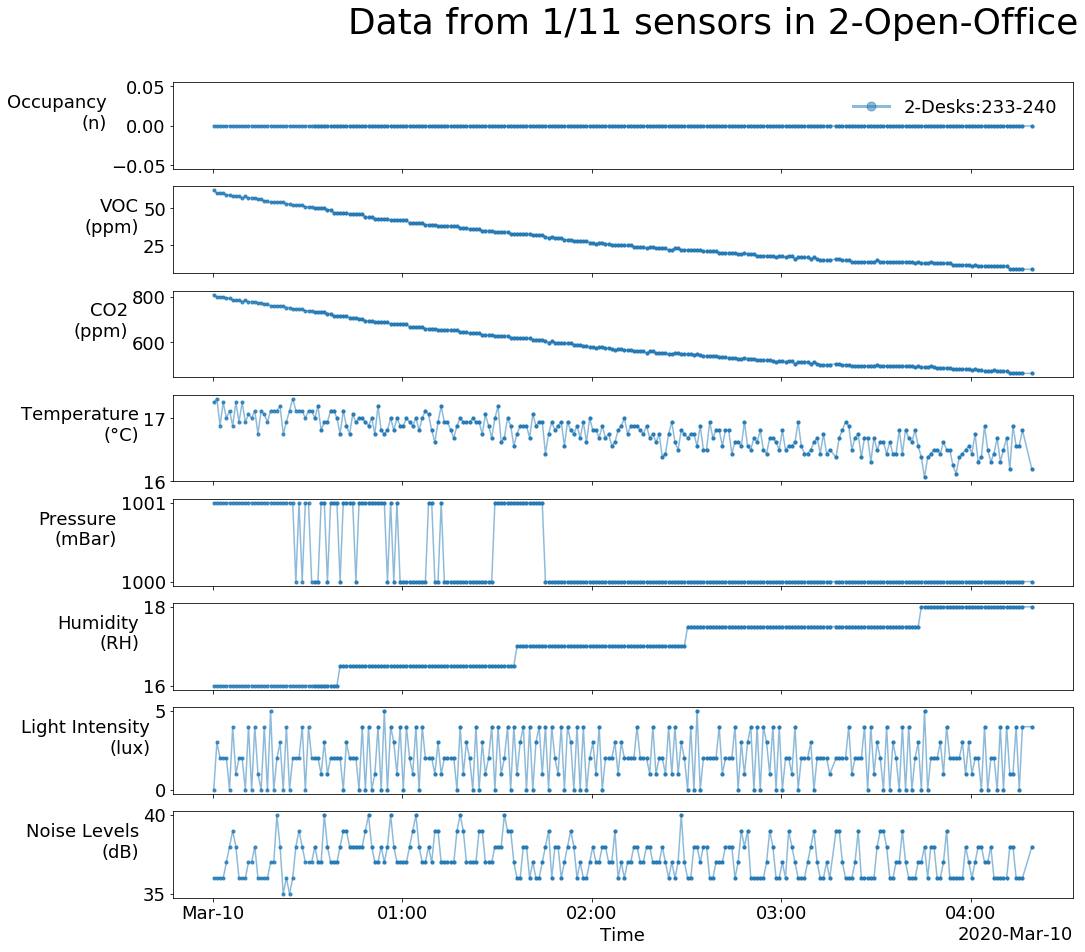

Plotting data from sensor 12: 2-Desks:241-244...


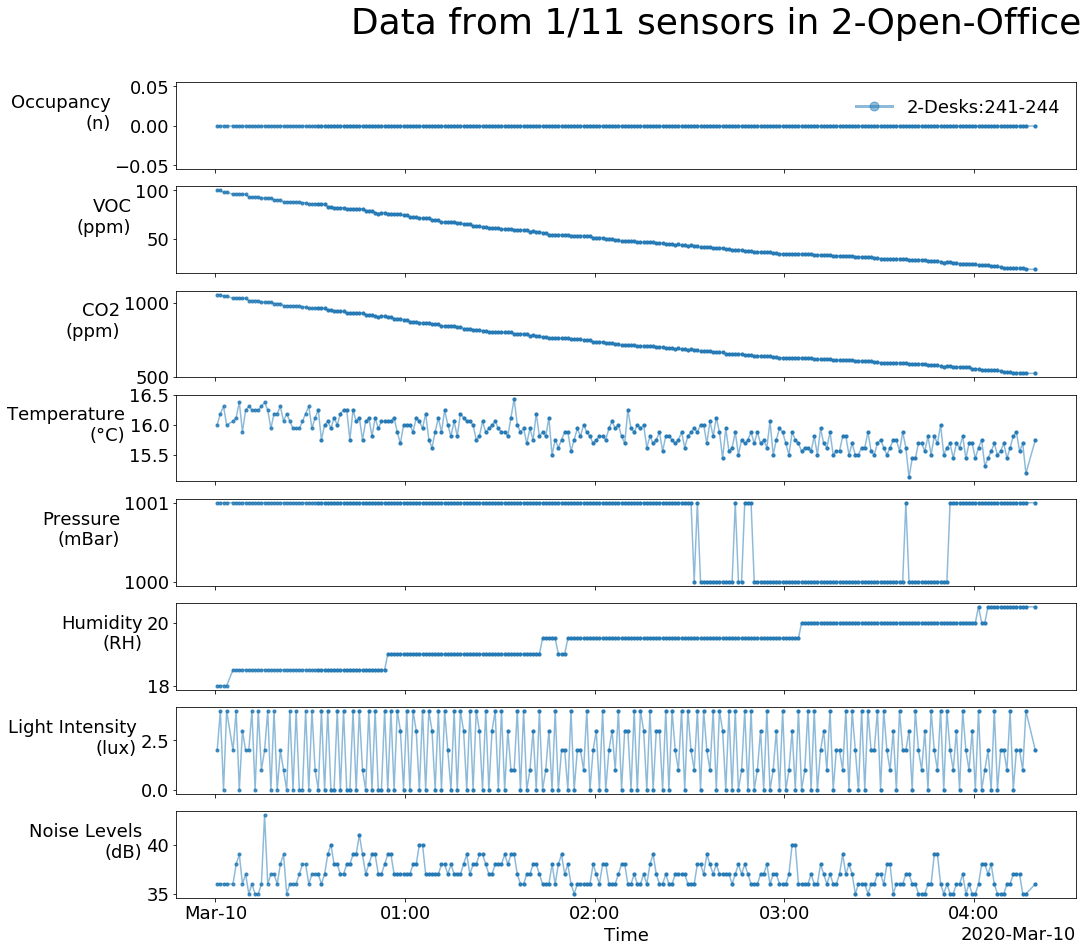

Plotting data from sensor 13: 2-Desks:245-254...


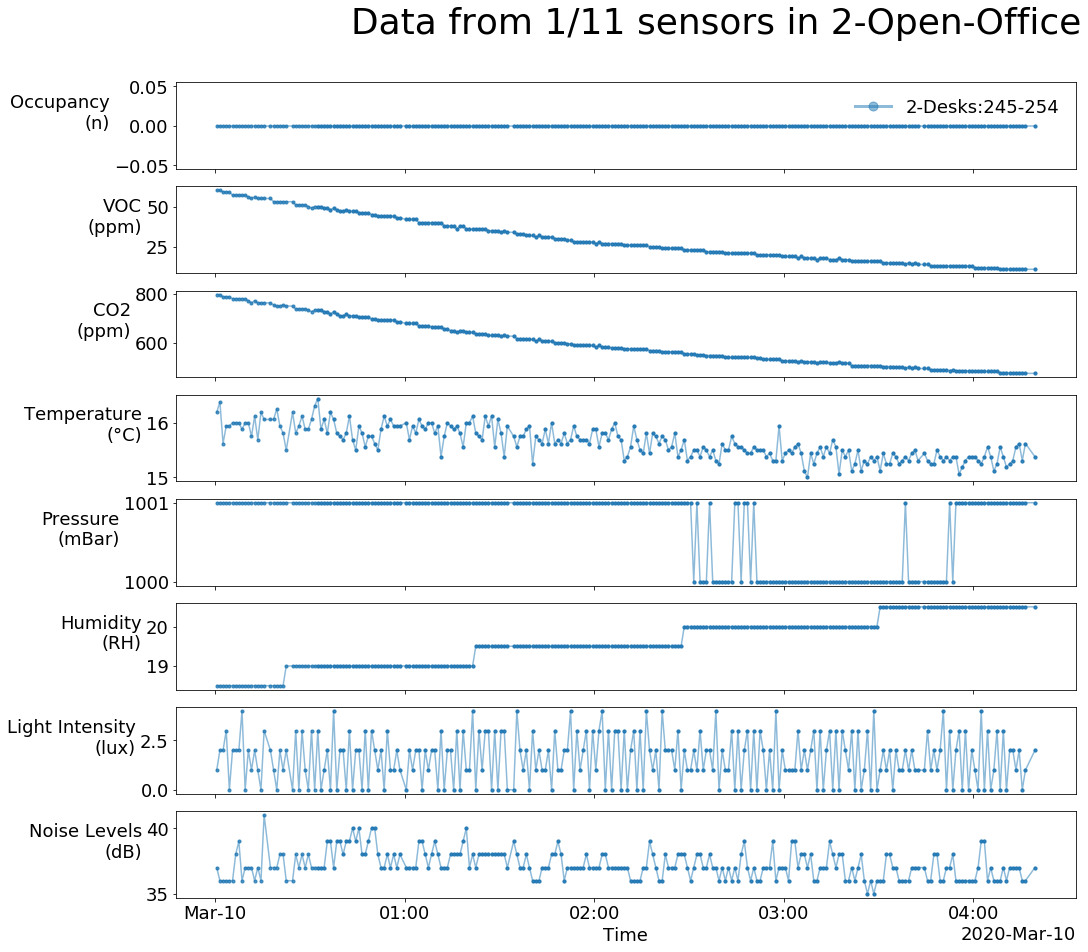

Plotting data from sensor 14: 2-Desks:255-257...


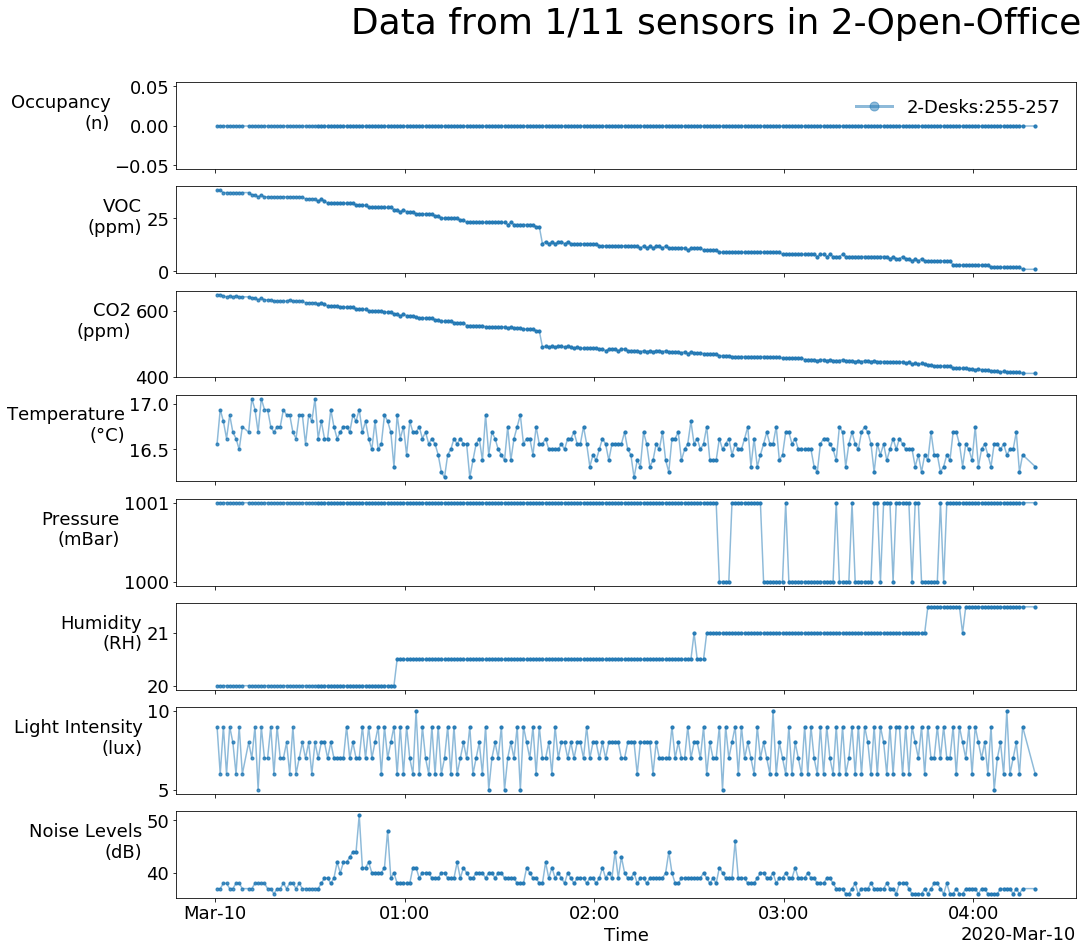

Plotting data from sensor 15: 2-Desks:258-260...


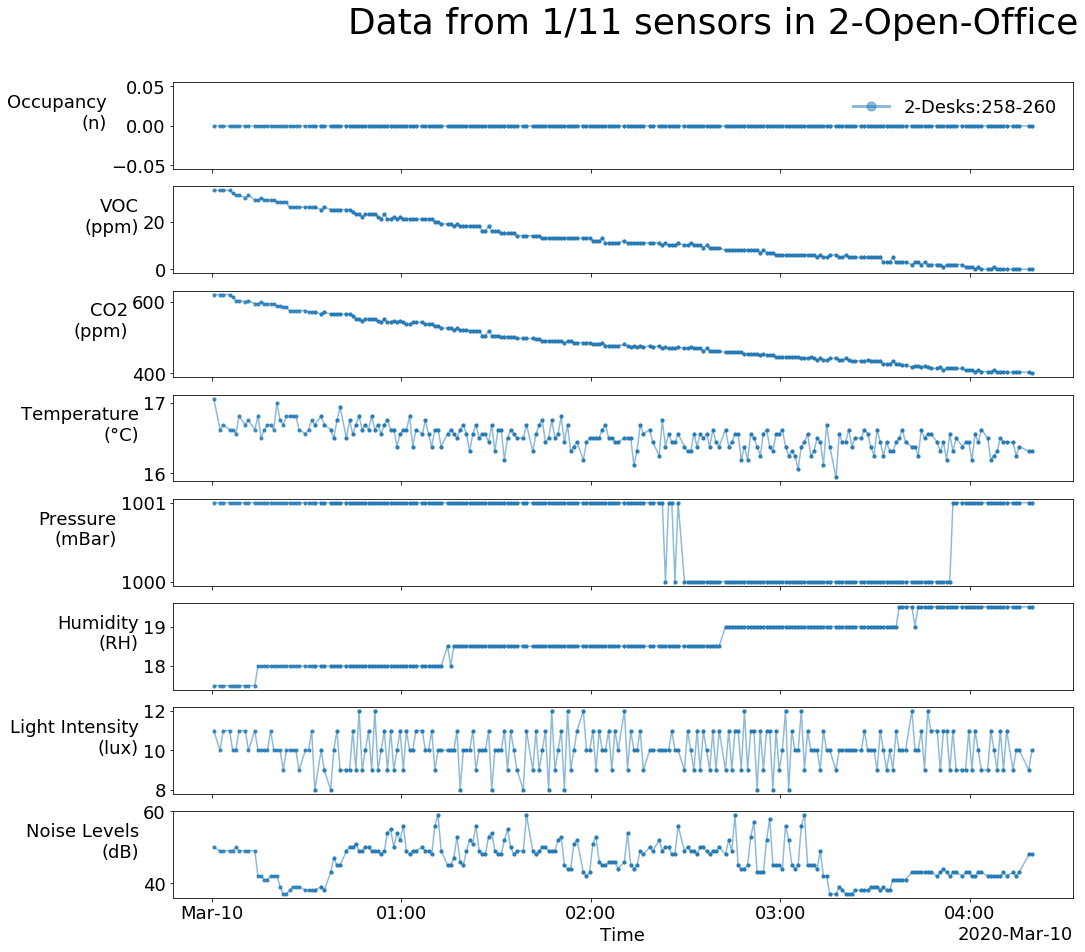

Plotting data from sensor 16: 2-Informal-Meeting-Area-2.01...


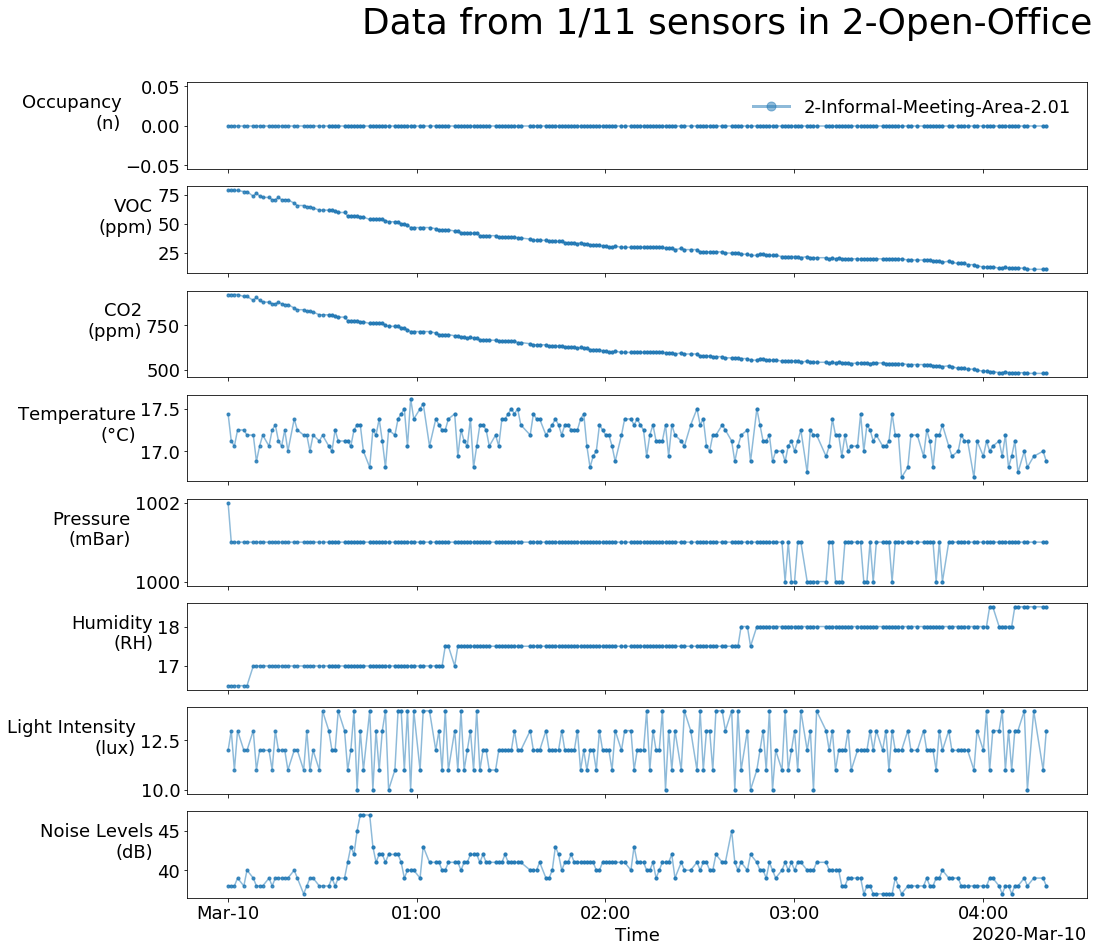

Closing connection to the database


In [20]:
# Set overlay to 0 and plot each sensor individually from the room 0-Café
DatabasePlotter().plot_from_database(rooms=['0-Café'], overlay = 0, 
                                     time_from=time_from, time_to=time_to)


### Overlay sensors from different rooms

By default, sensors from the same rooms are overlaid on seperate plots. If you want all of the sensors you have chosen (using either the 'sensors' or 'rooms' input on one plot, set 'seperate' to 0. Senors for wjhich there is no data will not be included on the plot.

Sensor locations retrieved successfully.
Room information retrieved successfully.
Plotting overlaid data from 5 sensors from 2 room(s)...


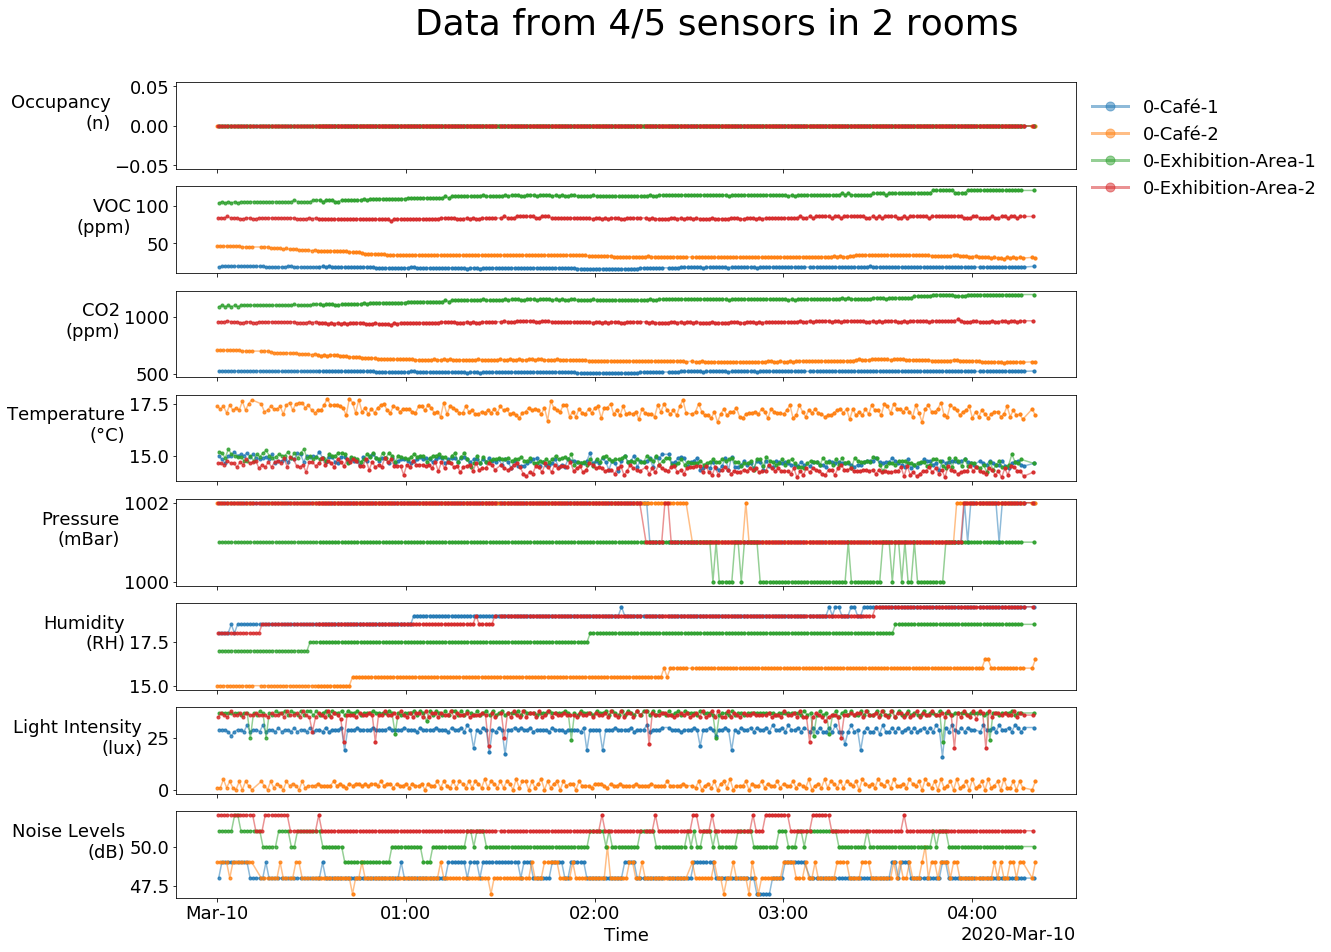

Closing connection to the database


In [22]:
# Set overlay to 0 and plot all sensors from two rooms on the same plot
DatabasePlotter().plot_from_database(rooms=['0-Café', '0-Exhibition-Area'], overlay = 1, seperate = 0,  
                                     time_from=time_from, time_to=time_to)

### Specify the parameters you want to plot.

Using the 'parameters' input, you can specify what paramters you want to plot by specifying parameters in a list. For example, if you want to plot just occupancy and CO2 levels...

Sensor locations retrieved successfully.
Room information retrieved successfully.
Plotting overlaid data from 2 sensors from room 1: 0-Café...


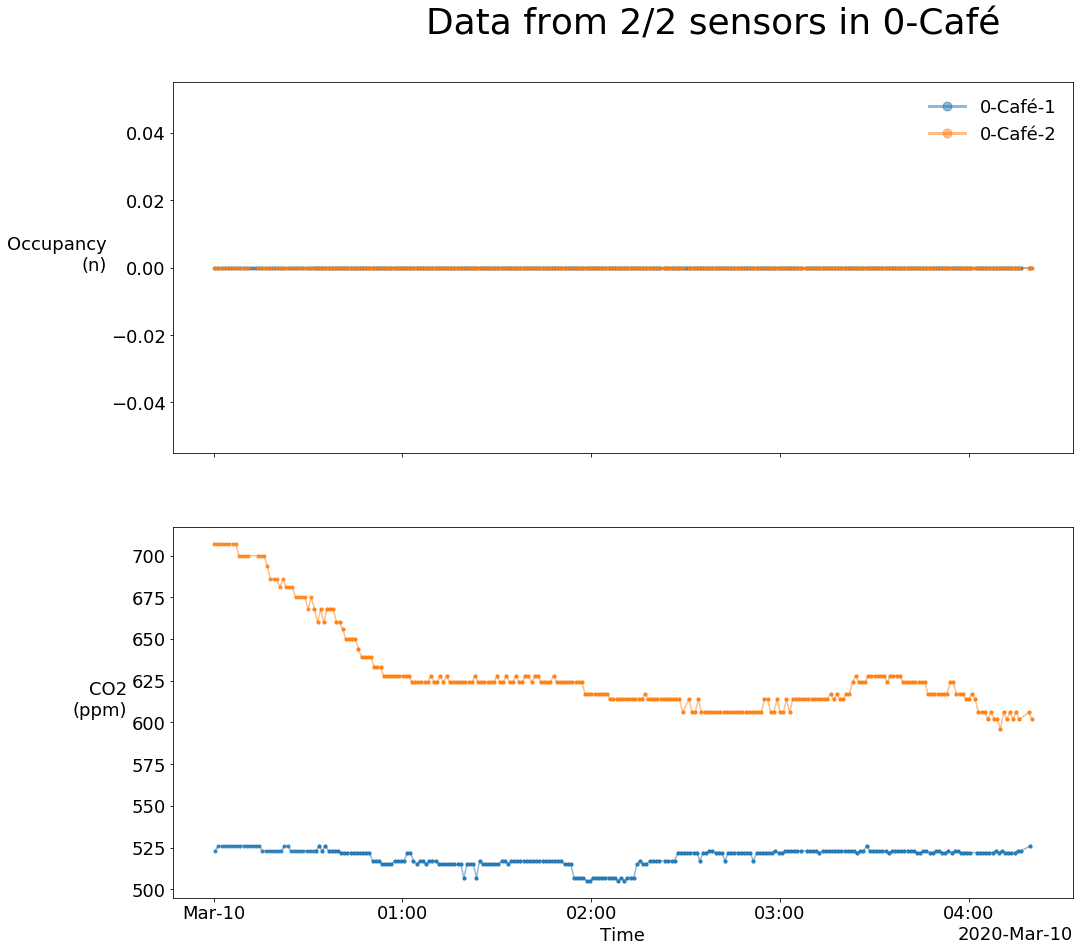

Closing connection to the database


In [24]:
# Specify the parameters to plot
DatabasePlotter().plot_from_database(rooms=1, parameters=['occupancy', 'CO2'],  
                                     time_from=time_from, time_to=time_to)

### Aggregate data from sensors in the same room

The aggregate function allows aggregation of the sensors in the same room. Data is aggregated using the 'aggregate_data' function and follows these steps:

1. Set time time base to minutes (not milliseconds)
2. Calculate the mean reading per minute for each sensor
3. Calculate the grand mean of all sensor readings in a room per minute (this step calculates sum for occupancy)

This can aggregate less than all of the sensors in a single room, but cannot aggregate sensors in different rooms.

Sensor locations retrieved successfully.
Room information retrieved successfully.
Aggregating data for 2 sensors in room 1: 0-Café...
Aggregating data for 3 sensors in room 2: 0-Exhibition-Area...
Aggregating data for 11 sensors in room 3: 2-Open-Office...
Plotting available data from 16 sensors from 3 rooms, aggregated and overlaid...


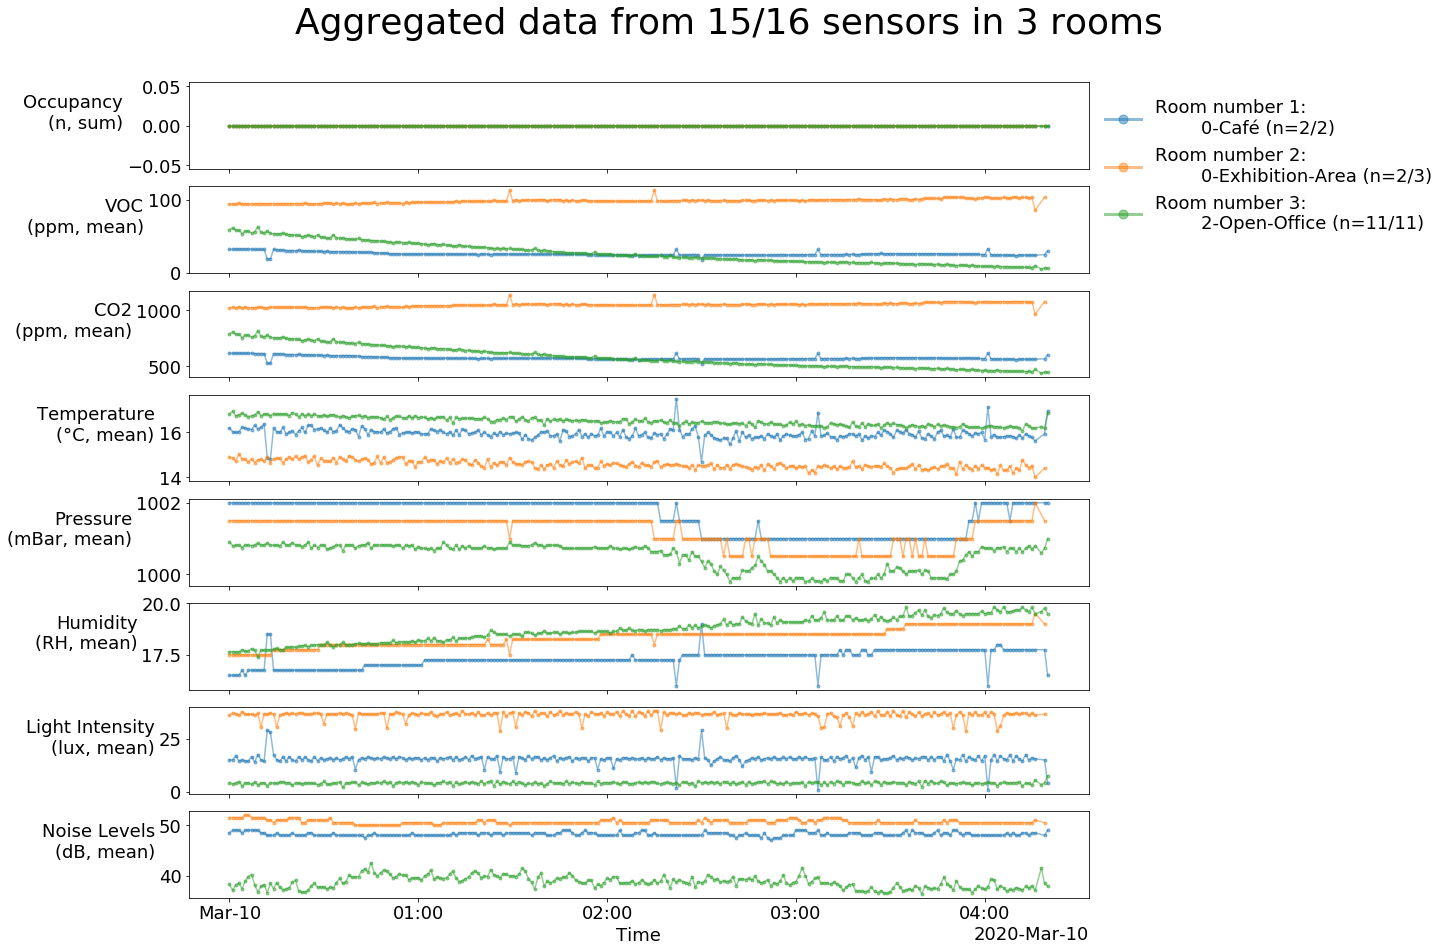

Closing connection to the database


In [25]:
# Plot aggregated data for 3 rooms
DatabasePlotter().plot_from_database(rooms=[1,2,3], aggregate=1,  
                                     time_from=time_from, time_to=time_to)

### Choose how to plot from the command line using 'choose_by_input' argument

Finally, instead of inputting what to plot in the script, you can choose what to plot from command line by changing the input argument 'choose_by_input'. This is the first argument,  so you simply specify 'sensors', 'rooms', or 'parameters', depending on what you want to choose. If you choose 'parameters', all sensors will be plotted.

    DatabasePlotter().plot_from_database('rooms')
    
    DatabasePlotter().plot_from_database('sensors')
        
    DatabasePlotter().plot_from_database('parameters')

You can set variables in 'plot_from_database' and still choose from the command line. This allows the user to input certain variables they do not want to keep entering manually, and only change the ones they are interested in.

Sensor locations retrieved successfully.
Room information retrieved successfully.

Available:
sensor_number 1: 0-Café-1.
sensor_number 2: 0-Café-2.
sensor_number 3: 0-Cafe-3.
sensor_number 4: 0-Exhibition-Area-1.
sensor_number 5: 0-Exhibition-Area-2.
sensor_number 6: 2-Desks:201-208.
sensor_number 7: 2-Desks:209-216.
sensor_number 8: 2-Desks:217-220.
sensor_number 9: 2-Desks:221-228.
sensor_number 10: 2-Desks:229-232.
sensor_number 11: 2-Desks:233-240.
sensor_number 12: 2-Desks:241-244.
sensor_number 13: 2-Desks:245-254.
sensor_number 14: 2-Desks:255-257.
sensor_number 15: 2-Desks:258-260.
sensor_number 16: 2-Informal-Meeting-Area-2.01.
sensor_number 17: LG-Meeting-Room-LG01.
sensor_number 18: LG-Meeting-Room-LG02.
sensor_number 19: [remove]LG-Meeting-Room-LG2.
sensor_number 20: UM-Meeting-Room-UM01.
sensor_number 21: UM-Meeting-Room-UM02.
sensor_number 22: UM-Meeting-Room-UM03.


Choose by number. Use the format:
 '1' for single, '1, 2, 3'for multiple, or press enter for all.
 Use 'range()' to return a list (e.g.'range(3,6)' returns '3,4,5'):
>> 4,5,6



Chosen:
sensor_number 4: 0-Exhibition-Area-1.
sensor_number 5: 0-Exhibition-Area-2.
sensor_number 6: 2-Desks:201-208.


No preference specified for: parameters, overlay, aggregate, seperate. 
Default: all, overlay, do not aggregate, rooms on different plots. 
Use default settings? 
[y/n]:  


Using defaults.
Plotting overlaid data from 2 sensors from room 2: 0-Exhibition-Area...
Closing connection to the database


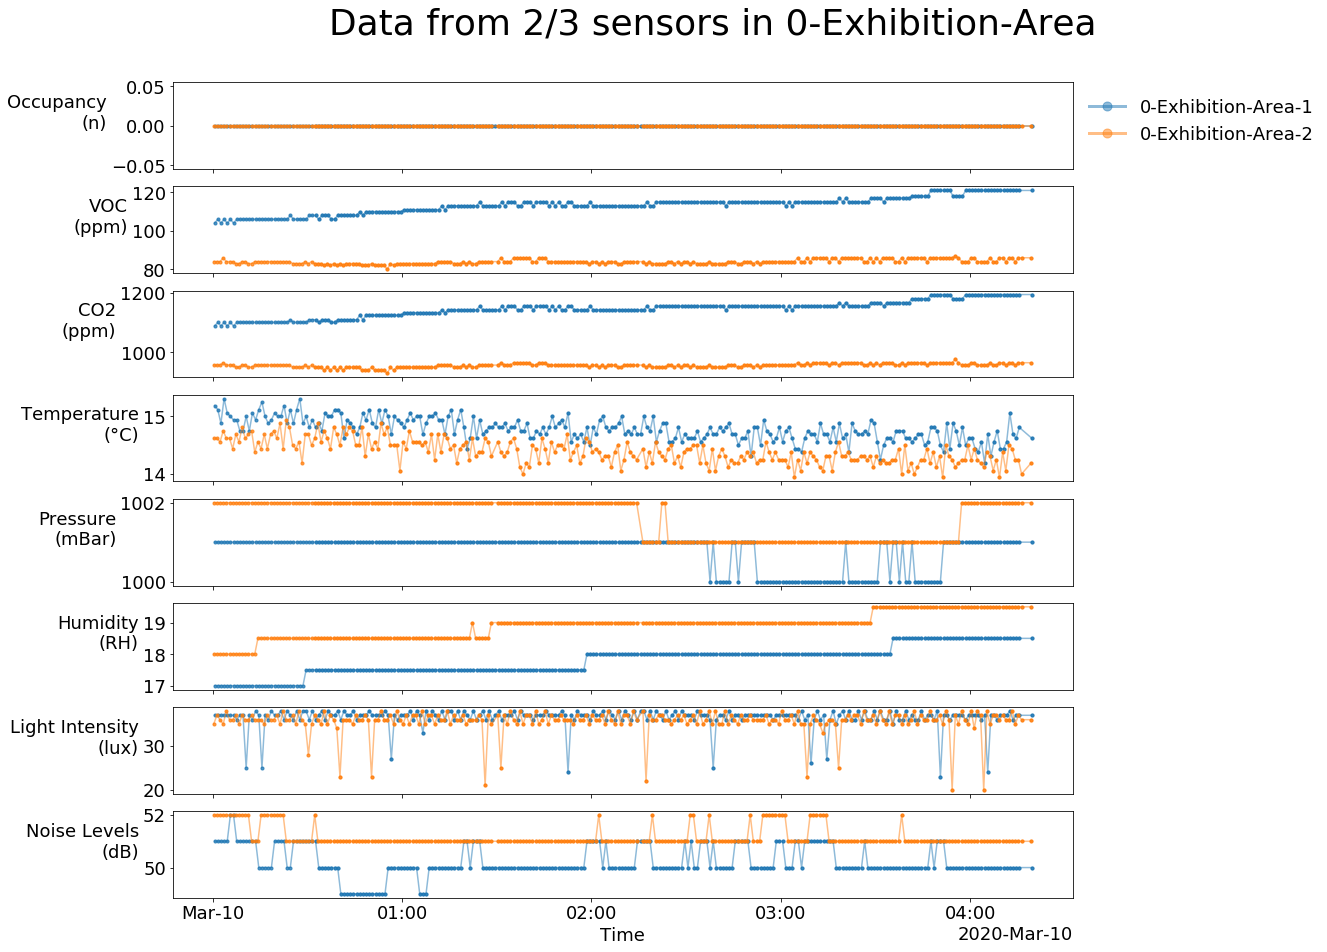

Plotting overlaid data from 1 sensors from room 3: 2-Open-Office...


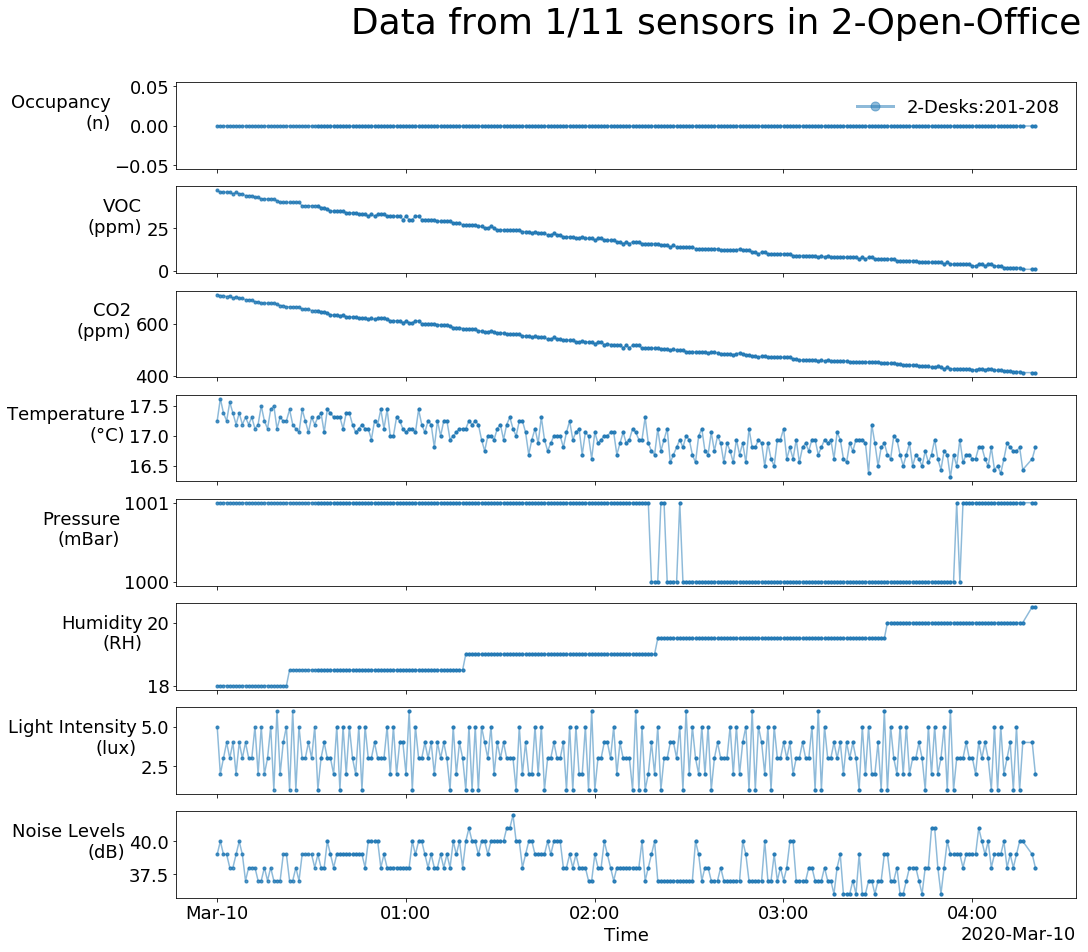

Closing connection to the database


In [28]:
# choose by sensor number
DatabasePlotter().plot_from_database('sensors', time_from=time_from, time_to=time_to)

In [ ]:
    time_from = 1583798400000
    time_to = 1583884800000